# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [2]:
# Add code here 🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_airbnb_data.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20250906174623,2025-09-06,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.22,4.56,3.22,3.67,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20250906174623,2025-09-06,city scrape,Funky Urban Gem: Prime Central Location - Park...,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.85,4.81,4.81,4.77,f,5,5,0,0,2.31
2,5651579,https://www.airbnb.com/rooms/5651579,20250906174623,2025-09-06,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.81,4.88,4.76,4.64,f,2,1,1,0,2.96
3,6623339,https://www.airbnb.com/rooms/6623339,20250906174623,2025-09-06,city scrape,Cozy City Stay · Free Parking + Walkable Location,Step into the charming and comfy 1BR/1BA apart...,Overview<br /><br />The lovely apartment is lo...,https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.83,4.70,4.80,4.72,f,5,5,0,0,2.66
4,9005989,https://www.airbnb.com/rooms/9005989,20250906174623,2025-09-06,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.95,4.93,4.87,4.77,f,1,1,0,0,5.63


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



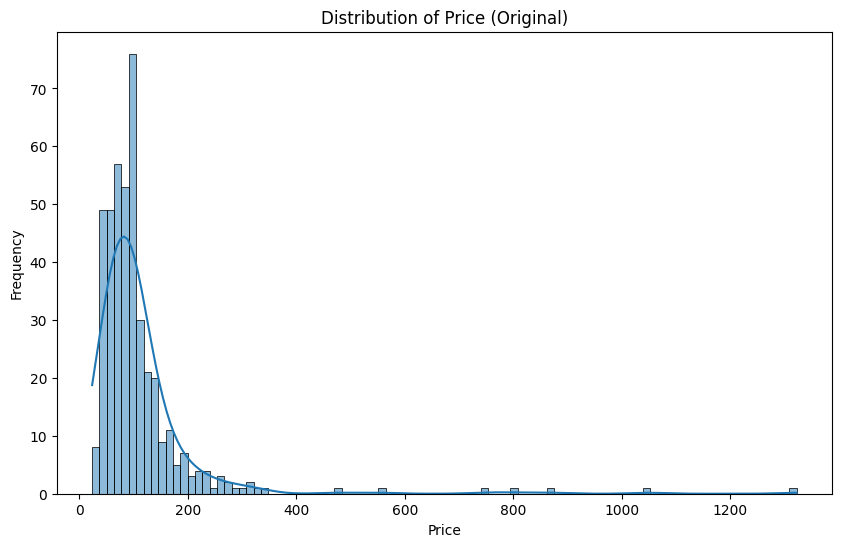

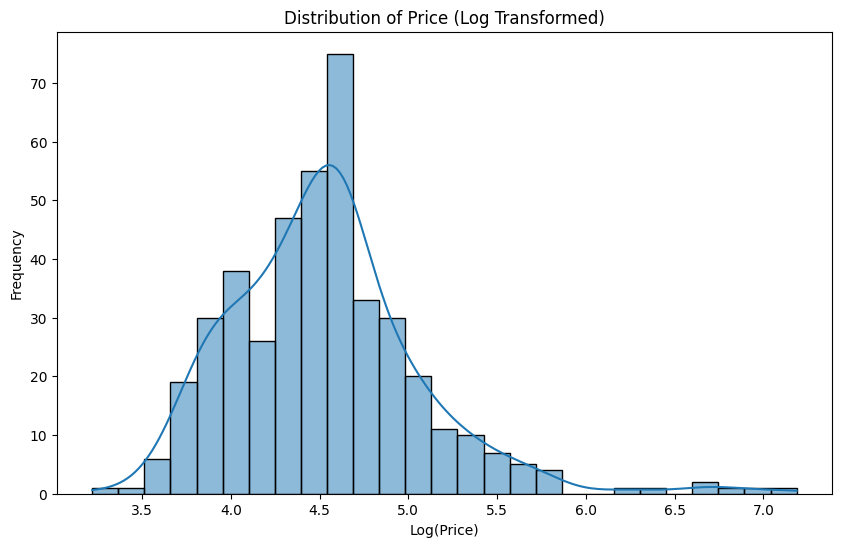

In [7]:
# Original distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), kde=True)
plt.title('Distribution of Price (Original)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Apply log transformation
# Add a small constant to avoid log(0)
df['price_log'] = np.log1p(df['price'])

# Distribution after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['price_log'].dropna(), kde=True)
plt.title('Distribution of Price (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

### ✍️ Your Response: 🔧
1. I examined the Price Column

2. I tried doing a Log transformation, because It’s the most effective, interpretable, and standard way to normalize right-skewed business data like price, especially when dealing with outliers and ratios

3. The log transformation reduced skew, stabilized variance, and made pricing data easier to interpret and model — improving clarity for both analysis and stakeholder review.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select two numeric columns
col1 = 'minimum_nights'
col2 = 'number_of_reviews'

# Min-Max scale
scaler_minmax = MinMaxScaler()
df[f'{col1}_minmax_scaled'] = scaler_minmax.fit_transform(df[[col1]])

# Z-score scale
scaler_standard = StandardScaler()
df[f'{col2}_zscore_scaled'] = scaler_standard.fit_transform(df[[col2]])

# Display the first few rows with the new columns
display(df[[col1, f'{col1}_minmax_scaled', col2, f'{col2}_zscore_scaled']].head())

,minimum_nights,minimum_nights_minmax_scaled,number_of_reviews,number_of_reviews_zscore_scaled
0,28,0.074176,9,-0.453767
1,2,0.002747,311,2.296448
2,2,0.002747,372,2.851955
3,2,0.002747,332,2.487688
4,1,0.000000,623,5.137730


### ✍️ Your Response: 🔧
1. the two columns that I scaled are minimum_nights and number_of_reviews. minimum_nights was scaled using the Min–Max method, and number_of_reviews was standardized using the Z-score (standardization) method.
2. The scaled values are more useful when building predictive models or conducting comparative analysis where variables with different ranges could bias the results.

3. Airbnb’s data science and analytics teams would benefit most from this transformation because scaled data ensures consistency when feeding variables into predictive models for pricing, demand forecasting, and user behavior. The revenue management team can use normalized values to compare listings across different markets without distortions from differing numeric ranges.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [11]:
column_to_group = 'number_of_reviews'
bins = [-np.inf, 10, 50, np.inf]
labels = ['Low', 'Medium', 'High']
df['review_category'] = pd.cut(df[column_to_group], bins=bins, labels=labels, include_lowest=True)
display(df[['number_of_reviews', 'review_category']].head())

,number_of_reviews,review_category
0,9,Low
1,311,High
2,372,High
3,332,High
4,623,High


### ✍️ Your Response: 🔧
1. I grouped number_of_reviews, I used three different categories

2. they might prefer this grouped view over the raw numbers becasue it is very simplified allowing for easy interpreation, and communication.

3. This grouped view would help Airbnb’s data analysts, marketing teams, and operations managers by simplifying complex data into clear, actionable categories. Analysts could quickly identify trends between low-, medium-, and high-review listings; marketing teams could target top-performing properties for promotion; and operations could focus on low-review hosts needing support.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [12]:
# Create 'price_per_night' column
# Handle cases where minimum_nights is 0 or NaN to avoid division by zero
df['price_per_night'] = df['price'] / df['minimum_nights'].replace(0, np.nan)

# Create 'is_long_stay' flag
df['is_long_stay'] = df['minimum_nights'] > 30

# Display the first few rows with the new columns
display(df[['price', 'minimum_nights', 'price_per_night', 'is_long_stay']].head())

,price,minimum_nights,price_per_night,is_long_stay
0,70.0,28,2.5,False
1,104.0,2,52.0,False
2,75.0,2,37.5,False
3,92.0,2,46.0,False
4,86.0,1,86.0,False


### ✍️ Your Response: 🔧 🔧
1. I created two new columns: price_per_night, which calculates the average nightly cost by dividing the total price by the minimum nights required, and is_long_stay, a flag that identifies listings requiring stays longer than 30 days.

2. hese columns would be useful for Airbnb hosts, property managers, and the platform’s analytics team. Hosts and managers can use them to evaluate pricing competitiveness and understand how their listings compare to others, while Airbnb analysts can use them to segment listings and monitor trends in nightly pricing or long-term rental availability.

3. The price_per_night metric helps users quickly identify overpriced or underpriced listings relative to market averages, supporting smarter pricing strategies. The is_long_stay flag helps identify which properties attract long-term renters, guiding marketing efforts or policy decisions for extended-stay programs.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [13]:
# Choose a categorical column to encode
column_to_encode = 'room_type'

# Apply one-hot encoding
one_hot_encoded = pd.get_dummies(df[column_to_encode], prefix=column_to_encode)

# Add the new encoded columns to the DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Display the first few rows with the new columns
display(df[[column_to_encode] + list(one_hot_encoded.columns)].head())

,room_type,room_type_Entire home/apt,room_type_Private room
0,Entire home/apt,True,False
1,Entire home/apt,True,False
2,Entire home/apt,True,False
3,Entire home/apt,True,False
4,Entire home/apt,True,False


1. I encoded the room_type column, because it represents different categories of listings (e.g., Entire home/apt, Private room, Shared room) that can strongly influence price and booking behavior
2. I used one-hot encoding, which creates separate binary columns for each room type.
3. For a business report, this transformation helps clearly show how different room types impact pricing and demand. By converting room types into numerical values, analysts can identify which categories such as entire homes or private rooms generate higher average revenue or occupancy. This allows stakeholders to make data-driven decisions about pricing strategy, market focus, and promotional efforts across different property types.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧
1. The transformation step that felt most important was scaling the numeric columns (`minimum_nights` and `number_of_reviews`) using Min-Max and Z-score normalization. This is crucial for many machine learning algorithms that are sensitive to the scale of input features.
2. The creation of the `price_per_night` and `is_long_stay` columns would be most useful to a host. 'price_per_night' gives them a clear metric to compare their pricing against others on a nightly basis, while 'is_long_stay' helps them understand if their listing attracts longer bookings, which can inform their strategy and amenities offered.
3. If I were going to build a tool or dashboard, I would next explore relationships between the transformed features and booking rates or review scores. For instance, I would analyze if listings with "High" review volume categories or those flagged as 'is_long_stay' have higher booking rates. I would also look at how 'price_per_night' varies across different 'room_type' categories. This would involve correlation analysis, some basic statistical modeling, and creating visualizations to present the findings clearly.
4. This assignment directly relates to my customized learning outcome about applying data transformation techniques to prepare real-world datasets for analysis and visualization. By performing scaling, binning, encoding, and feature creation, I have practiced turning raw data into a format suitable for business intelligence and analytical tasks, which is a key part of my learning objective.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [15]:
!jupyter nbconvert --to html "assignment_07_data_transformation.ipynb"

[NbConvertApp] Converting notebook assignment_07_data_transformation.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 427703 bytes to assignment_07_data_transformation.html
